##Tarea 7 Machine Learning
_Jhojan Stiven Zea Fernandez_

_C.C 1.037.669.632_


$$\begin{array}{|c|c|} \hline
\text{Planeta} & \text{Periodo} & \text{Radio medio}  \\ \hline
\text{Mercurio} & 0.241 & 0.39  \\
\text{Venus} & 0.615 & 0.72  \\
\text{Tierra} & 1.0 & 1.0  \\
\text{Marte} & 1.88 & 1.52  \\
\text{Jupiter} & 11.8 & 5.20 \\
\text{Saturno} & 29.5 & 9.54 \\
\text{Urano}& 84.0 & 19.18  \\
\text{Neptuno} & 165.0 & 30.06 \\
\text{Pluton} & 248.0 & 39.44  \\ \hline
\end{array}$$

Figura 1: Tabla del tiempo del periodo (en años) versus el radio (en Unidades Astronomicas) de los planetas del sistema solar

##Problema
Redescubra la ley tercera ley de Kepler. Use la tabla mostrada en la figura 1 y la ecuacion
$$T(r,\theta)=αr^{\theta_{1}}$$

donde $\alpha$ y $\theta_{1}$ son los parametros a encontrar usando regresion lineal. En este caso $r$ es la distancia media (radio) del planeta desde el sol, y $T$ es el periodo en unidades de años por orbita, *pist: Use una funcion para convertir esto en una ecuacion lineal y use las tecnicas desarrolladas en clase para ecuaciones lineales*

##Solucion

Para empezar, podemos graficar los datos y vemos que, tal y como esta definido por $T(r,\theta)$, tienen un comportamiento exponencial, lo primero es linealizar los datos para aplicar los metodos vistos en clase, esto se puede hacer al tomar el logaritmo a ambos lados.

$$ln(T)=ln(α)+\theta_{1}*ln(r)$$


Esto nos da un sistema lineal de la forma $y=mx+b$ donde
$$y=ln(T),\quad b=ln(\alpha), \quad m=\theta_{1},\quad  x=ln(r)$$
Cuando se hace el plot de estos datos modificados, con el codigo anterior, se puede observar que estos ya se ajustan muy bien a una linea recta, por lo que solo es necesario realizar una regresion polinomial de grado 1, osea una regresion lineal




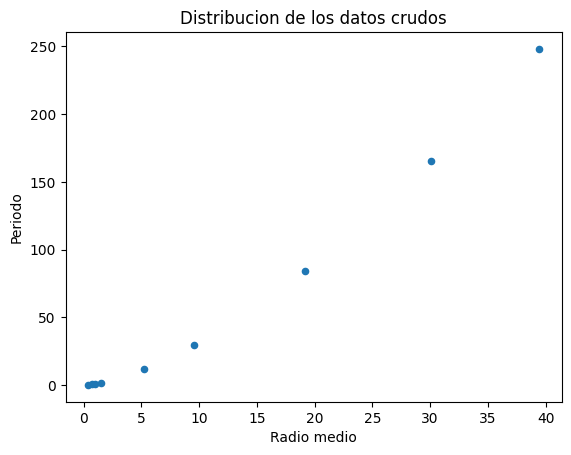

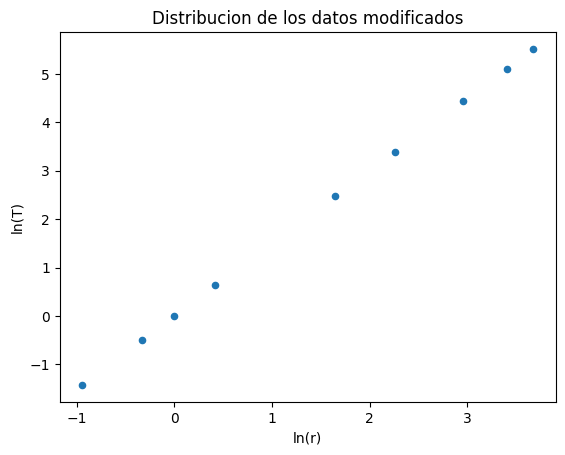

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datos = {'Planeta': ['Mercurio', 'Venus', 'Tierra', 'Marte', 'Jupiter', 'Saturno', 'Urano', 'Neptuno', 'Pluton'],
        'Periodo': [0.241, 0.615, 1.0, 1.88, 11.8, 29.5, 84.0, 165.0, 248.0],
        'Radio medio': [0.39, 0.72, 1.0, 1.52, 5.20, 9.54, 19.18, 30.06, 39.44]}
df = pd.DataFrame(datos)
plot1=df.plot.scatter(x='Radio medio',y='Periodo',title='Distribucion de los datos crudos')

df['ln(r)'] = np.log(df['Radio medio'])
df['ln(T)'] = np.log(df['Periodo'])


plot2=df.plot.scatter(x='ln(r)',y='ln(T)',title='Distribucion de los datos modificados')


En este caso, la hipotesis de la regresion polinomica de grado uno sería:
$$h(\beta,x)=\beta_0+\beta_1 x$$
donde $\beta_0=ln(\alpha),\beta_1=\theta_1$

por tanto la matriz $X$ o de diseño para este problema se define como.
$$X=\begin{pmatrix}
1 & ln(0.39) \\
1 & ln(0.72) \\
1 & ln(1.0) \\
1 & ln(1.52) \\
1 & ln(5.2) \\
1 & ln(9.54) \\
1 & ln(19.18) \\
1 & ln(30.06) \\
1 & ln(39.44) \\
\end{pmatrix}$$

y el vector $\beta$ como $\beta=\begin{pmatrix}\beta_0 & \beta_1  \end{pmatrix}$

Por lo tanto tenemos un problema en terminos matriciales como $X\beta=y$

Este problema de optimizacion para descubrir los mejores parametros del modelo se puede resolver con muchos metodos vistos en clase, tales como el descenso del gradiente, sin embargo, al ser un problema con pocas features y datos, se va a utilizar el metodo de las ecuaciones normales
$$\beta=(X^{T}X)^{-1}X^{T}y$$

implementando todo lo anterior en codigo


In [101]:
#Se construye la matriz de diseño y el vector objetivo como se definio anteriormente
X = np.c_[np.ones(len(df)), df['ln(r)']]
y = df['ln(T)']

beta = np.linalg.inv(X.T @ X)@(X.T @ y)

ln_alpha = beta[0]
theta_1 = beta[1]
alpha = np.exp(ln_alpha)

print(f"alpha: {alpha}")
print(f"theta_1: {theta_1}")


alpha: 0.998847083476362
theta_1: 1.5006383640881769


El modelo final tiene un $\alpha=0.998847$ y un $\theta_1=1.5006383$, para validar que estos son los parametros mas optimos, podemos comparar la distribucion original de los datos, con el modelo de la ecuacion de kepler con los datos encontrados como se ve en la siguiente grafica

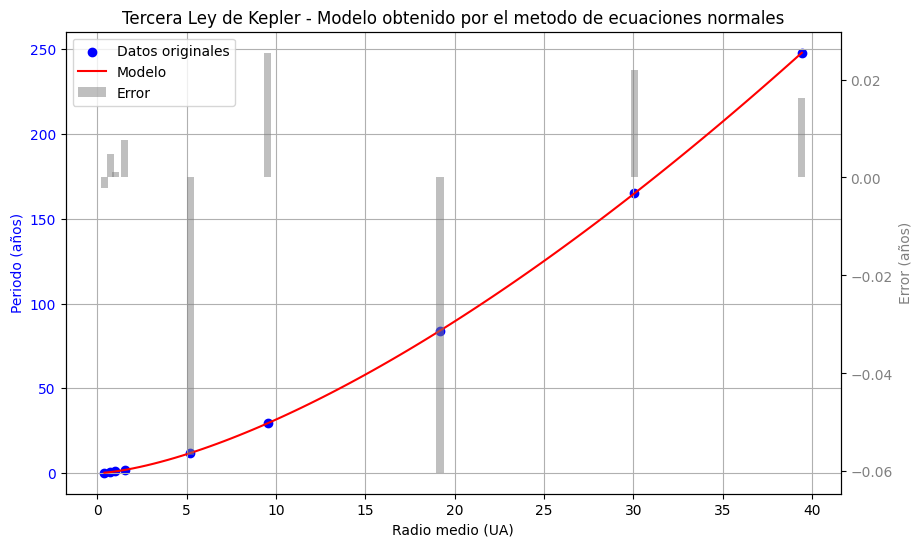

In [103]:
r_values = np.linspace(df['Radio medio'].min(), df['Radio medio'].max(), 100)
T_predicted = alpha * r_values**theta_1


T_estimated = alpha * df['Radio medio']**theta_1
errors = df['Periodo'] - T_estimated

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.scatter(df['Radio medio'], df['Periodo'], marker='o', label='Datos originales', color='blue')
ax1.plot(r_values, T_predicted, color='red', label='Modelo')
ax1.set_xlabel('Radio medio (UA)')
ax1.set_ylabel('Periodo (años)', color='blue')
ax1.tick_params('y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.bar(df['Radio medio'], errors, width=0.4, color='gray', alpha=0.5, label='Error')
ax2.set_ylabel('Error (años)', color='gray')
ax2.tick_params('y', labelcolor='gray')

ax1.set_title('Tercera Ley de Kepler - Modelo obtenido por el metodo de ecuaciones normales')
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
ax1.grid(True)

plt.show()

Podemos observar que el modelo con los parametros obtenidos por el metodo de las ecuaciones normales se ajusta muy bien a los datos y tiene un error maximo de -0.06